In [2]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 10.0 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

In [ ]:
import os
import shutil
from random import sample

# Define the source directory (default folder inside labels)
source_dir = './coco_converted1/labels/default'

# Define the parent directory (labels)
parent_dir = './coco_converted1/labels'

# Move all files from 'default' to 'labels' (parent directory)
for filename in os.listdir(source_dir):
    shutil.move(os.path.join(source_dir, filename), parent_dir)


In [ ]:

import os
import shutil
from random import sample

def split_data(source, dest, split_ratio=(0.8, 0.2)):
    # Ensure the destination directory exists
    os.makedirs(dest, exist_ok=True)
    train_dir = os.path.join(dest, 'train')
    val_dir = os.path.join(dest, 'val')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Get all file paths
    files = [os.path.join(source, f) for f in os.listdir(source) if os.path.isfile(os.path.join(source, f))]

    # Shuffle and split the files
    shuffled_files = sample(files, len(files))
    split_index = int(len(files) * split_ratio[0])
    train_files = shuffled_files[:split_index]
    val_files = shuffled_files[split_index:]

    # Function to copy files to a target directory
    def copy_files(files, directory):
        for f in files:
            shutil.copy(f, directory)

    # Copy files to the respective directories
    copy_files(train_files, train_dir)
    copy_files(val_files, val_dir)

# Paths to your images and labels directories
images_path = './batches/batch1/images'
labels_path = './batches/batch1/labels'

# Desired output path for the split dataset
output_path = './batches/batch1/dataset'

# Perform the split for images and labels
split_data(images_path, os.path.join(output_path, 'images'))
split_data(labels_path, os.path.join(output_path, 'labels'))



In [ ]:
!cat /content/drive/MyDrive/batch1/dataset.yaml

train: ./dataset/images/train/
val: ./dataset/images/val/

nc: 1  # replace with your actual number of classes
names: sperm_cell  # replace with your actual class names


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model (adjust the model name if needed)
model = YOLO('yolov8m-seg.pt')  # or another appropriate pretrained model

# Train the model on your dataset
model.train(data='/content/drive/MyDrive/batch1/dataset.yaml', epochs=50)  # point 'data' to your dataset.yaml file


Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/batch1/dataset.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 42.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 206MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/batch1/dataset/labels/train... 394 images, 6 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:28<00:00, 13.81it/s]


train: New cache created: /content/drive/MyDrive/batch1/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/batch1/dataset/labels/val... 99 images, 1 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:06<00:00, 14.66it/s]


val: New cache created: /content/drive/MyDrive/batch1/dataset/labels/val.cache
Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.16G       1.72       2.55      2.647      1.344        122        640: 100%|██████████| 25/25 [00:11<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        100        450      0.112       0.48      0.138     0.0816      0.103       0.44      0.117     0.0342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.99G      1.416      1.775      1.342      1.182         94        640: 100%|██████████| 25/25 [00:07<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        100        450   0.000233     0.0156   0.000119   4.72e-05     0.0001    0.00667   5.03e-05   8.38e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.15G      1.478      1.756      1.357      1.228        167        640: 100%|██████████| 25/25 [00:06<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        100        450    0.00181     0.0978   0.000979   0.000367   0.000633     0.0422   0.000331   9.41e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.12G      1.466      1.749      1.292      1.219         66        640: 100%|██████████| 25/25 [00:06<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        100        450     0.0003       0.02   0.000154   3.06e-05      4e-05    0.00222   1.67e-05   1.67e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.13G      1.445      1.768      1.227        1.2        121        640: 100%|██████████| 25/25 [00:06<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        100        450     0.0439      0.524     0.0336     0.0135     0.0457      0.451     0.0295    0.00851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.28G      1.433      1.713      1.196      1.216        106        640: 100%|██████████| 25/25 [00:07<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]

                   all        100        450      0.485      0.328      0.341      0.162      0.374      0.265      0.238     0.0667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.14G      1.428      1.653      1.163      1.209        107        640: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        450      0.584       0.52      0.498      0.283      0.579      0.504      0.473      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.19G      1.367      1.595      1.145      1.198        131        640: 100%|██████████| 25/25 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        100        450        0.4      0.562      0.362      0.196      0.339      0.481      0.268     0.0734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.08G       1.29      1.596      1.089      1.135        107        640: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        100        450      0.613      0.696      0.661      0.384      0.622      0.644      0.621      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.01G      1.316       1.53      1.064      1.148        113        640: 100%|██████████| 25/25 [00:06<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        100        450      0.721      0.738      0.757      0.425      0.632      0.618      0.592      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.06G      1.272      1.554      1.026      1.127        163        640: 100%|██████████| 25/25 [00:06<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        450      0.703      0.744       0.75      0.432      0.663      0.713      0.686      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.11G      1.283      1.502      1.022      1.144         79        640: 100%|██████████| 25/25 [00:06<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]

                   all        100        450      0.645      0.636      0.643       0.32      0.551      0.549      0.501      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.13G       1.24      1.524     0.9818      1.117        148        640: 100%|██████████| 25/25 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        100        450      0.743      0.711      0.742       0.45      0.729      0.705       0.72      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.06G      1.204      1.496     0.9213       1.11        110        640: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        100        450      0.743      0.752      0.783      0.468       0.68      0.738      0.727       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.15G      1.197      1.447     0.9431      1.104         90        640: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        100        450      0.726      0.729      0.771      0.468      0.707      0.702      0.711      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.21G      1.225      1.456     0.9848      1.112        123        640: 100%|██████████| 25/25 [00:07<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        100        450      0.656      0.737      0.723      0.432      0.717      0.618      0.673      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.06G      1.179      1.374     0.9373      1.115        108        640: 100%|██████████| 25/25 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        100        450      0.774      0.744       0.79      0.499      0.754      0.735      0.774       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.97G      1.161      1.439     0.9229      1.094        100        640: 100%|██████████| 25/25 [00:07<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        100        450      0.735      0.781      0.804      0.511      0.705       0.75      0.757      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.11G      1.118      1.346     0.8558      1.069         92        640: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        100        450      0.772      0.807      0.808      0.524      0.754      0.758      0.782      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.14G      1.119      1.346      0.856       1.07        110        640: 100%|██████████| 25/25 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        100        450      0.732      0.798      0.787      0.507      0.732      0.791      0.771      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.03G      1.111      1.371      0.849      1.062         92        640: 100%|██████████| 25/25 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]

                   all        100        450      0.768      0.796      0.812       0.52      0.752      0.767      0.792      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.16G      1.098      1.337     0.8164      1.065         89        640: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        100        450       0.76      0.749      0.781      0.458      0.592      0.578      0.506      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.22G       1.08      1.329     0.8114      1.061        104        640: 100%|██████████| 25/25 [00:07<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        100        450      0.758      0.827      0.819      0.514      0.747      0.798      0.796      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.08G      1.077      1.333     0.8125      1.058        132        640: 100%|██████████| 25/25 [00:06<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        450      0.771      0.793      0.818      0.523      0.735      0.696      0.679      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.04G      1.053       1.27     0.7649      1.043         96        640: 100%|██████████| 25/25 [00:06<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        100        450      0.777      0.791       0.83      0.551      0.797       0.74      0.802      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.01G      1.037      1.257     0.7778      1.039        113        640: 100%|██████████| 25/25 [00:06<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        450      0.782      0.791      0.832      0.537      0.723       0.72      0.721      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.13G     0.9858      1.207     0.7423      1.016        107        640: 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        100        450       0.81      0.789      0.841      0.555      0.791      0.767      0.803      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.03G      1.016      1.223     0.7447      1.021        125        640: 100%|██████████| 25/25 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all        100        450      0.769      0.805      0.824      0.536      0.769      0.733      0.785      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.11G     0.9787       1.18     0.7279      1.011        143        640: 100%|██████████| 25/25 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        100        450      0.797      0.831      0.862      0.588      0.795      0.778      0.824      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.02G     0.9659      1.204     0.7182      1.008        102        640: 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        100        450      0.788       0.76      0.831      0.549      0.799      0.767      0.824      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.12G     0.9722      1.214     0.7237      1.019        136        640: 100%|██████████| 25/25 [00:07<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        100        450      0.816      0.801      0.852      0.571      0.817      0.781      0.828      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.96G      0.946      1.171     0.7028     0.9982         96        640: 100%|██████████| 25/25 [00:06<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        100        450      0.809      0.789      0.848      0.564      0.771      0.749      0.777      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.99G     0.9349      1.163     0.6871      1.005         98        640: 100%|██████████| 25/25 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        100        450      0.745      0.863      0.865      0.584      0.772      0.762       0.78      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.03G     0.9322      1.146      0.679     0.9929        127        640: 100%|██████████| 25/25 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        100        450      0.786      0.824      0.869      0.593      0.795       0.82      0.858      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.08G     0.9064       1.15      0.662     0.9743         99        640: 100%|██████████| 25/25 [00:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        100        450      0.835      0.831      0.872      0.592      0.836      0.794      0.853      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.18G      0.901      1.143     0.6642     0.9795        111        640: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        100        450      0.813      0.812       0.87       0.59      0.818        0.8      0.856      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.96G     0.8787      1.105     0.6384     0.9775         95        640: 100%|██████████| 25/25 [00:06<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        100        450      0.836      0.829      0.877      0.592      0.836      0.829      0.857      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.08G     0.8735       1.12     0.6271     0.9704        102        640: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        100        450       0.82      0.838       0.88      0.599      0.807      0.824      0.865      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.14G     0.8802      1.103     0.6249     0.9782        125        640: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

                   all        100        450      0.859      0.804      0.875      0.593      0.839      0.787      0.854      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50       8.1G     0.8584      1.099     0.6094     0.9554        116        640: 100%|██████████| 25/25 [00:07<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        100        450      0.803      0.829      0.853      0.583      0.786       0.86      0.858      0.392


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.85G     0.8794      1.085     0.6373      1.009         64        640: 100%|██████████| 25/25 [00:08<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        100        450      0.815      0.776      0.837      0.563      0.836      0.773      0.844      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50       7.9G     0.8494      1.083     0.6031     0.9852         51        640: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

                   all        100        450      0.824      0.835      0.872      0.602      0.821      0.838      0.875      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.89G     0.8377       1.02     0.5664     0.9788         88        640: 100%|██████████| 25/25 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        100        450      0.834      0.812      0.878      0.608      0.847      0.796      0.864      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.02G     0.8359      1.038     0.5783     0.9774         77        640: 100%|██████████| 25/25 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]

                   all        100        450      0.832      0.822      0.877      0.596      0.846      0.824      0.872      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.85G     0.8174      1.017     0.5524     0.9703         67        640: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        100        450      0.848      0.813      0.879      0.595      0.835      0.831      0.876      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.88G     0.8039      1.017     0.5507     0.9675         58        640: 100%|██████████| 25/25 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        100        450      0.829       0.83      0.876      0.604      0.838      0.833      0.873      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50       7.9G     0.7519     0.9669     0.5107     0.9359         80        640: 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]

                   all        100        450      0.834      0.824      0.875      0.609      0.846      0.811      0.874      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       7.9G     0.7525     0.9863     0.5187     0.9416         51        640: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        100        450      0.867      0.826      0.889      0.616      0.874      0.818      0.892      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.85G     0.7424     0.9915     0.5097     0.9395         61        640: 100%|██████████| 25/25 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.52it/s]

                   all        100        450      0.849      0.833      0.888      0.622      0.843      0.836      0.879      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.99G     0.7367      1.003     0.5005      0.936         77        640: 100%|██████████| 25/25 [00:06<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all        100        450      0.834      0.829       0.89      0.622      0.847      0.836      0.886      0.425



50 epochs completed in 0.135 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 54.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


                   all        100        450      0.835      0.829       0.89      0.622      0.842      0.831      0.883      0.425
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/segment/train2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d70be162dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
oof = model.predict('/content/frame107098.jpg')


image 1/1 /content/frame107098.jpg: 640x640 9 sperm_cells, 14.7ms
Speed: 2.5ms preprocess, 14.7ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /content/frame24901.jpg: 640x608 4 sperm_cells, 86.6ms
Speed: 2.7ms preprocess, 86.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 608)


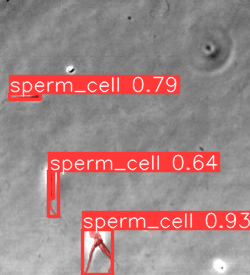

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display  # Import display from IPython.display

# Run inference on 'bus.jpg'
results = model('/content/frame24901.jpg')  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image

    # Display image in Colab
    display(im)

    # Save image if needed
    im.save('results2.jpg')


In [ ]:
print(oof)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'sperm_cell'}
orig_img: array([[[152, 152, 152],
        [152, 152, 152],
        [152, 152, 152],
        ...,
        [168, 168, 168],
        [174, 174, 174],
        [179, 179, 179]],

       [[151, 151, 151],
        [151, 151, 151],
        [151, 151, 151],
        ...,
        [167, 167, 167],
        [170, 170, 170],
        [173, 173, 173]],

       [[150, 150, 150],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [168, 168, 168],
        [169, 169, 169],
        [170, 170, 170]],

       ...,

       [[143, 143, 143],
        [142, 142, 142],
        [141, 141, 141],
        ...,
        [162, 162, 162],
        [164, 164, 164],
        [166, 166, 166]],

       [[142, 142, 142],
        [142, 142, 142],
        [141, 141, 141],
        ...,
        [162, 162, 162],
        

In [ ]:
model2 = YOLO('/content/drive/MyDrive/batch1/runs/segment/train2/weights/best.pt')


image 1/1 /content/frame24901.jpg: 640x608 4 sperm_cells, 15.7ms
Speed: 2.2ms preprocess, 15.7ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 608)


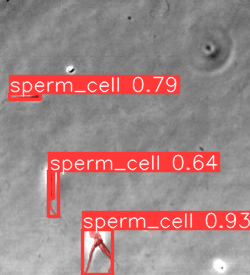

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display  # Import display from IPython.display

# Run inference on 'bus.jpg'
results = model2('/content/frame24901.jpg')  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image

    # Display image in Colab
    display(im)

    # Save image if needed
    im.save('results3.jpg')

<h2>Batch 3 plus 1</h2>


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model (adjust the model name if needed)
model = YOLO('yolov8m-seg.pt')  # or another appropriate pretrained model

# Train the model on your dataset
model.train(data='/content/drive/MyDrive/project-sperm/batches/batch_1_plus_3/dataset.yaml', epochs=50)  # point 'data' to your dataset.yaml file

Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/project-sperm/batches/batch_1_plus_3/dataset.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 4.27MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 22.7MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/project-sperm/batches/batch_1_plus_3/dataset/labels/train... 784 images, 56 backgrounds, 0 corrupt: 100%|██████████| 840/840 [01:37<00:00,  8.59it/s]


train: New cache created: /content/drive/MyDrive/project-sperm/batches/batch_1_plus_3/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/project-sperm/batches/batch_1_plus_3/dataset/labels/val... 199 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:23<00:00,  8.65it/s]


val: New cache created: /content/drive/MyDrive/project-sperm/batches/batch_1_plus_3/dataset/labels/val.cache
Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.01G      1.509      2.109      1.861      1.245         41        640: 100%|██████████| 53/53 [00:36<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        200        920      0.388      0.395      0.318      0.142      0.379      0.312      0.248     0.0649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.43G      1.442      1.703      1.294       1.22         61        640: 100%|██████████| 53/53 [00:34<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


                   all        200        920      0.148      0.552      0.123     0.0578      0.142        0.5      0.109     0.0335

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.47G       1.47      1.739      1.283       1.25         34        640: 100%|██████████| 53/53 [00:36<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]


                   all        200        920       0.34      0.311      0.223      0.089      0.194      0.177     0.0808     0.0161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.05G      1.428      1.646      1.252      1.229         48        640: 100%|██████████| 53/53 [00:35<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        200        920      0.503       0.54      0.471      0.245      0.481      0.493      0.412      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.35G      1.371      1.632      1.203      1.209         58        640: 100%|██████████| 53/53 [00:36<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


                   all        200        920       0.59      0.636      0.583      0.311      0.574      0.608      0.552      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.43G      1.312      1.555      1.116      1.172         60        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        200        920      0.676      0.688      0.691      0.403      0.646      0.653      0.631        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50       8.2G      1.301      1.516      1.105      1.186         36        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        200        920      0.687      0.717      0.748      0.441      0.612      0.677      0.656      0.224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50       8.2G      1.251      1.502       1.07      1.151         45        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        920      0.692      0.753      0.752       0.47      0.679      0.712      0.708      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.28G      1.217      1.432      1.027       1.16         45        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.697      0.675       0.69      0.399      0.604      0.612      0.579      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.32G      1.177      1.417     0.9784      1.112         52        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920       0.74      0.758       0.78      0.513      0.752      0.722      0.766      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.36G      1.169       1.35     0.9692      1.123         56        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        200        920      0.761      0.741       0.78      0.502      0.763      0.716      0.751       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.07G      1.152      1.353     0.9426       1.11         39        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.721      0.755      0.773      0.472      0.697      0.715      0.716      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.11G       1.14      1.344     0.9661      1.111         47        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        200        920      0.713      0.779      0.783      0.498      0.708      0.714      0.706      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.51G      1.124      1.349     0.9277      1.098         60        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.752      0.779      0.821       0.53      0.738      0.737      0.758       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.07G      1.102      1.305     0.8926      1.085         56        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.766      0.717      0.758      0.488       0.77      0.717      0.758      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.23G      1.068      1.244     0.8899      1.075         54        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        200        920      0.781       0.79      0.828      0.552      0.778      0.765      0.802      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.13G      1.069      1.286      0.896      1.074         62        640: 100%|██████████| 53/53 [00:35<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.794      0.772       0.83       0.57       0.81      0.743      0.818      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.52G      1.035      1.259     0.8565      1.067         51        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.827      0.789      0.853      0.579      0.837      0.773      0.847      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50       8.2G      1.057      1.237     0.8571      1.074         52        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.783      0.805      0.855      0.554      0.782      0.788      0.824       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.23G      1.023      1.218     0.8426      1.056         36        640: 100%|██████████| 53/53 [00:35<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        920      0.787      0.797      0.855      0.577      0.786      0.771      0.814       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.29G      1.017      1.213     0.8364      1.046         47        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        200        920       0.77      0.783      0.827      0.546      0.776      0.766      0.807      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.25G      1.008      1.206     0.7937      1.038         69        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.787      0.825       0.87      0.581      0.806      0.812      0.855      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50       8.3G     0.9712      1.197     0.7757      1.031         69        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        200        920      0.787      0.832      0.862       0.58       0.82      0.808      0.863      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.28G      0.975      1.176     0.7765      1.033         56        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.797      0.815      0.858      0.581      0.797      0.815      0.849      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.21G     0.9902      1.207     0.7946      1.039         41        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.786      0.817      0.857      0.594      0.785      0.801      0.844      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.42G      0.965      1.195     0.7749      1.022         36        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.795      0.815      0.848      0.567      0.777       0.84       0.85      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.53G     0.9592      1.152     0.7511      1.029         73        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.822      0.805      0.862      0.598      0.828      0.835      0.872      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.25G     0.9497      1.157     0.7553      1.024         63        640: 100%|██████████| 53/53 [00:35<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.804      0.857      0.869        0.6      0.815      0.838      0.865      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.14G     0.9378      1.145     0.7243      1.025         41        640: 100%|██████████| 53/53 [00:35<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920       0.83       0.82      0.872      0.615      0.835      0.835      0.875      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.52G     0.9264       1.13     0.7078      1.008         53        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        200        920      0.815      0.809      0.862      0.611      0.826      0.817      0.881      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50       8.4G      0.918      1.127     0.7337      1.007         63        640: 100%|██████████| 53/53 [00:35<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        920      0.828      0.842      0.868      0.602      0.842      0.837      0.869       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50       8.3G     0.9228      1.126     0.7126      1.008         40        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.791      0.853       0.87      0.615       0.84      0.826      0.877      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.15G     0.8901       1.08     0.6989     0.9964         50        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        920       0.81       0.84      0.865       0.61      0.818      0.859      0.882      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.54G     0.8877      1.094     0.6837     0.9942         37        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.812      0.848      0.863      0.619      0.844      0.842      0.879      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.26G     0.8712      1.089     0.6646     0.9807         48        640: 100%|██████████| 53/53 [00:35<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.849      0.826      0.871      0.611      0.864      0.835      0.873        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50       8.2G     0.8571      1.061     0.6587     0.9811         65        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920        0.8      0.867      0.865      0.606      0.827       0.87      0.877      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.24G     0.8492      1.048     0.6378     0.9775         80        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        200        920      0.818      0.865      0.879      0.624      0.868       0.84      0.883      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.42G     0.8529      1.069     0.6158     0.9804         72        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        920      0.858      0.867      0.892      0.642      0.859      0.864      0.886      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.09G     0.8262      1.063     0.6189     0.9683         49        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        920      0.842      0.854      0.882      0.629      0.857      0.851      0.881      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.24G     0.8147      1.036     0.6145     0.9658         91        640: 100%|██████████| 53/53 [00:35<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        920      0.852      0.853      0.883      0.633      0.865      0.848      0.876       0.41


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.18G     0.8267      1.051     0.6142      0.991         39        640: 100%|██████████| 53/53 [00:36<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        920      0.818      0.854      0.872      0.622      0.827      0.845      0.857       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.46G     0.8109      1.028     0.6117     0.9822         37        640: 100%|██████████| 53/53 [00:34<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.832      0.856      0.876      0.631       0.88      0.849       0.89      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.08G     0.7938      1.021     0.5892     0.9731         38        640: 100%|██████████| 53/53 [00:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        920      0.851      0.837      0.882      0.628      0.853      0.863      0.893      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.17G     0.7923     0.9849     0.5897     0.9774         25        640: 100%|██████████| 53/53 [00:34<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920       0.84      0.852      0.882       0.63      0.868      0.846      0.892       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.17G     0.7842     0.9811     0.5824     0.9715         36        640: 100%|██████████| 53/53 [00:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        920      0.866      0.855      0.888       0.64      0.862      0.845      0.876      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.38G     0.7601     0.9691     0.5608      0.957         19        640: 100%|██████████| 53/53 [00:34<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        920      0.817      0.884      0.887      0.633       0.87       0.84      0.876      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.14G     0.7577     0.9789     0.5507     0.9595         49        640: 100%|██████████| 53/53 [00:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        200        920      0.875       0.85      0.892      0.647      0.877      0.852      0.884      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.29G     0.7315     0.9505     0.5517     0.9434         23        640: 100%|██████████| 53/53 [00:34<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        920      0.874       0.87       0.89      0.647      0.879      0.869      0.887      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.14G     0.7308     0.9513     0.5335     0.9477         38        640: 100%|██████████| 53/53 [00:35<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        920      0.869      0.865      0.892      0.652       0.88      0.856      0.895      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.06G     0.7236     0.9663     0.5265     0.9445         50        640: 100%|██████████| 53/53 [00:34<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        200        920      0.849      0.881       0.89      0.651      0.875      0.868      0.897      0.433



50 epochs completed in 0.571 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 54.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]


                   all        200        920      0.848       0.88      0.888      0.651      0.874      0.868      0.897      0.434
Speed: 0.2ms preprocess, 11.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/segment/train3


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eeaac508790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
# !cp -r runs/ "/content/drive/MyDrive/project-sperm/batches/batch_1_plus_3"
import shutil
shutil.copytree('runs', "/content/drive/MyDrive/project-sperm/batches/batch_1_plus_3/runs")



'/content/drive/MyDrive/project-sperm/batches/batch_1_plus_3/runs'

<h1>Bundle model</h1>

<h2>batch 10</h2>

In [2]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model (adjust the model name if needed)
model = YOLO('yolov8m-seg.pt')  # or another appropriate pretrained model

# Train the model on your dataset
model.train(data='/content/drive/MyDrive/project-sperm/batches/batch10/dataset.yaml', epochs=50)  # point 'data' to your dataset.yaml file

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/project-sperm/batches/batch10/dataset.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/drive/MyDrive/project-sperm/batches/batch10/dataset/labels/train.cache... 299 images, 100 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/project-sperm/batches/batch10/dataset/labels/val.cache... 73 images, 28 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<?, ?it/s]


Plotting labels to runs/segment/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.67G       1.84      2.901      4.754      1.578         20        640: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        101         90      0.174        0.2     0.0729     0.0292       0.13      0.156     0.0468     0.0159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.22G      1.759      2.281      3.084      1.467         21        640: 100%|██████████| 25/25 [00:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        101         90    0.00053      0.178   0.000314   9.96e-05   0.000277     0.0889   0.000145   3.34e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50       7.9G      1.874      2.356      2.655      1.562         29        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        101         90   0.000313     0.0444   0.000111   2.97e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.89G      1.855      2.255      2.507      1.572         18        640: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        101         90   0.000154     0.0444   0.000151   5.38e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.17G      1.891      2.202       2.39      1.631         27        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        101         90   0.000103     0.0333    5.7e-05   2.62e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.89G      1.863      2.223      2.345      1.592         20        640: 100%|██████████| 25/25 [00:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        101         90   0.000237     0.0778   0.000134   3.37e-05   3.31e-05     0.0111   1.67e-05   1.67e-06



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.88G      1.808      2.043      2.199      1.525         20        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        101         90     0.0699      0.189     0.0332     0.0141      0.061      0.111     0.0188    0.00557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.89G      1.772      2.168      2.211      1.534         19        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        101         90      0.187      0.233      0.136     0.0523      0.133      0.289      0.103     0.0305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.88G      1.753      2.104      2.086      1.464         19        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        101         90      0.213      0.356      0.174       0.07      0.203      0.278      0.124     0.0349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.88G      1.735      2.049       1.97      1.475         18        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        101         90      0.214      0.222      0.122      0.045      0.134      0.167     0.0832     0.0292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.92G      1.657      2.007      1.952      1.504         18        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        101         90      0.253        0.3      0.219     0.0876      0.363      0.267      0.241     0.0692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.91G      1.658       1.97      1.948      1.443         21        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        101         90      0.292        0.3      0.219     0.0911      0.302      0.311      0.208     0.0655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.92G      1.585      1.891      1.866      1.406         14        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        101         90      0.406      0.433      0.351      0.123      0.385      0.467      0.334     0.0936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.19G      1.574      1.939      1.839      1.413         20        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        101         90      0.291      0.544      0.324      0.146      0.377      0.378      0.331      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50       7.9G      1.536      1.764      1.709      1.401         20        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        101         90       0.39      0.322      0.256      0.116      0.431      0.356       0.31     0.0806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.91G      1.535      1.844        1.8      1.426         20        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        101         90      0.324      0.433      0.282      0.112      0.333      0.444      0.259     0.0803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.21G      1.472      1.893      1.837      1.397         28        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        101         90      0.313      0.444      0.304      0.132      0.296      0.422        0.3     0.0954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.15G       1.46      1.825      1.715      1.332         22        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        101         90      0.449        0.5      0.445      0.212      0.451      0.467      0.427      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.91G       1.46      1.853      1.671      1.328         26        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        101         90      0.405      0.422      0.363       0.16      0.444      0.411      0.363      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.91G      1.397      1.768      1.602      1.319         17        640: 100%|██████████| 25/25 [00:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        101         90      0.486      0.444      0.404      0.205      0.504      0.441      0.373      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.19G      1.404      1.871      1.547       1.32         16        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        101         90       0.45      0.572      0.439      0.176      0.424      0.478      0.413       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.23G      1.424      1.695      1.539       1.33         15        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        101         90       0.39      0.512      0.386      0.183      0.408      0.522      0.397      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50       7.9G      1.375      1.772      1.537      1.276         22        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        101         90      0.307      0.522      0.278      0.131      0.347      0.478      0.288     0.0891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.89G      1.312      1.595      1.443      1.249         14        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        101         90      0.429        0.6      0.394       0.17      0.398      0.556      0.378      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50       7.9G      1.346      1.668      1.444      1.262         19        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        101         90      0.435      0.533       0.44      0.195      0.362      0.522      0.415      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.91G      1.296      1.691      1.376      1.214         21        640: 100%|██████████| 25/25 [00:16<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        101         90      0.445      0.578      0.421      0.214      0.467      0.556      0.396      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.91G      1.299      1.766      1.448      1.264         28        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        101         90       0.59      0.511      0.519      0.242      0.544      0.467      0.398      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.94G      1.222       1.59      1.357      1.199         18        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        101         90      0.458        0.6      0.499       0.21       0.51      0.478      0.434      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.19G       1.26      1.653      1.377      1.228         23        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        101         90      0.569      0.544      0.479      0.212      0.489      0.478      0.388      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.92G      1.185      1.584      1.339       1.18         18        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        101         90      0.528      0.559      0.495      0.234       0.46        0.5       0.45       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50       7.9G      1.213      1.669      1.321      1.216         22        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        101         90      0.492      0.589      0.478       0.24      0.521      0.508      0.428      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.92G      1.217      1.612      1.305      1.206         15        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        101         90      0.657      0.553      0.606      0.266      0.508      0.589      0.519      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.87G      1.173      1.563      1.238      1.172         28        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        101         90      0.557      0.544      0.521      0.265      0.609      0.555      0.456      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.88G      1.147      1.525      1.212      1.159         25        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        101         90      0.573      0.633      0.535      0.271      0.513      0.522      0.456       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.92G      1.114      1.515      1.157      1.166         11        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        101         90      0.645      0.585      0.588      0.309      0.533        0.6      0.527      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.92G      1.089      1.514      1.153      1.137         26        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        101         90      0.623      0.644      0.626      0.308      0.678      0.561      0.611      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50       8.2G      1.053      1.415      1.144      1.122         26        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        101         90      0.546      0.667      0.595      0.264      0.558      0.674      0.569      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.88G       1.11      1.486      1.194      1.142         21        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        101         90      0.694      0.511      0.599      0.306      0.583       0.56      0.537      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50       7.9G      1.047      1.468      1.128       1.11         22        640: 100%|██████████| 25/25 [00:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        101         90      0.564      0.676       0.56       0.31      0.565      0.648      0.564      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.88G       1.01      1.323      1.031      1.096         16        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        101         90      0.573      0.722      0.637      0.334      0.545      0.722      0.572      0.201


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.21G      1.046      1.372      1.092      1.177         14        640: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        101         90      0.574      0.722      0.681      0.341      0.611      0.622      0.598      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.89G      1.014      1.328      1.016       1.15         11        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        101         90      0.702      0.667      0.691      0.384      0.707      0.678       0.67      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.91G      0.974      1.309     0.9621      1.147         13        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        101         90      0.657      0.702      0.675       0.36      0.645      0.711      0.627      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.92G     0.9386      1.291     0.9215       1.11         13        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        101         90      0.633      0.689      0.659      0.319      0.611        0.7      0.595      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.88G     0.9469      1.264     0.9162      1.113         18        640: 100%|██████████| 25/25 [00:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        101         90      0.633      0.667      0.677      0.358      0.577      0.589      0.553      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50       7.9G     0.9195      1.255     0.8516      1.076         12        640: 100%|██████████| 25/25 [00:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        101         90      0.651      0.726      0.722      0.386      0.615      0.656      0.606      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.91G     0.9066      1.219      0.837      1.079         14        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        101         90      0.616      0.722      0.697      0.361      0.594        0.7       0.61      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.91G     0.8393      1.221     0.8232       1.06         13        640: 100%|██████████| 25/25 [00:15<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        101         90      0.641      0.667      0.669      0.342      0.575      0.711       0.59      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50       8.2G     0.8492      1.198        0.8      1.049         11        640: 100%|██████████| 25/25 [00:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        101         90      0.617      0.733      0.648      0.345      0.611      0.744      0.627      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.21G     0.8622      1.247     0.7809      1.071         15        640: 100%|██████████| 25/25 [00:15<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        101         90      0.639      0.729      0.677      0.371       0.64      0.732       0.63      0.215



50 epochs completed in 0.269 hours.
Optimizer stripped from runs/segment/train5/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train5/weights/best.pt, 54.8MB

Validating runs/segment/train5/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


                   all        101         90      0.706      0.666      0.692      0.384      0.697      0.667      0.645      0.224
                bundle        101         90      0.706      0.666      0.692      0.384      0.697      0.667      0.645      0.224
Speed: 0.4ms preprocess, 12.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/segment/train5


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1cd6b88fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [3]:

import shutil
shutil.copytree('runs', "/content/drive/MyDrive/project-sperm/batches/batch10/runs")


'/content/drive/MyDrive/project-sperm/batches/batch10/runs'

In [4]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model (adjust the model name if needed)
model = YOLO('yolov8m-seg.pt')  # or another appropriate pretrained model

# Train the model on your dataset
model.train(data='/content/drive/MyDrive/project-sperm/batches/batch_10_plus_8/dataset.yaml', epochs=50)  # point 'data' to your dataset.yaml file


import shutil
shutil.copytree('runs', "/content/drive/MyDrive/project-sperm/batches/batch_10_plus_8/runs")

100%|██████████| 52.4M/52.4M [00:00<00:00, 299MB/s]


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/project-sperm/batches/batch_10_plus_8/dataset.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 112MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 341MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/project-sperm/batches/batch_10_plus_8/dataset/labels/train... 596 images, 204 backgrounds, 0 corrupt: 100%|██████████| 800/800 [01:32<00:00,  8.69it/s]


train: New cache created: /content/drive/MyDrive/project-sperm/batches/batch_10_plus_8/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/project-sperm/batches/batch_10_plus_8/dataset/labels/val... 146 images, 54 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:22<00:00,  8.84it/s]

val: New cache created: /content/drive/MyDrive/project-sperm/batches/batch_10_plus_8/dataset/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.99G      1.664      2.645      3.557       1.49         22        640: 100%|██████████| 50/50 [00:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        200        172      0.231       0.18      0.141     0.0589       0.21      0.174      0.133     0.0346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.92G      1.891      2.347       2.68       1.71         15        640: 100%|██████████| 50/50 [00:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        200        172      0.231       0.18      0.141     0.0589       0.21      0.174      0.133     0.0346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.94G      1.919      2.396      2.486      1.743         25        640: 100%|██████████| 50/50 [00:33<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


                   all        200        172      0.167       0.36      0.132     0.0549      0.169      0.366      0.117     0.0357

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.94G      1.919      2.215      2.328      1.768         33        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


                   all        200        172      0.198      0.198     0.0735     0.0263        0.2      0.198     0.0784     0.0234

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.91G      1.836      2.151      2.154      1.703         26        640: 100%|██████████| 50/50 [00:33<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        172      0.155     0.0872     0.0687     0.0164      0.169       0.18     0.0928     0.0309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.93G      1.806      2.141      2.137      1.666         12        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        200        172       0.26      0.308      0.197     0.0943       0.28      0.285      0.194     0.0662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.93G      1.755      1.983      2.005      1.624         17        640: 100%|██████████| 50/50 [00:33<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


                   all        200        172      0.062       0.11     0.0301     0.0118     0.0607      0.128     0.0278    0.00788

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.95G      1.627      1.973      1.874      1.535         44        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        200        172      0.227      0.273      0.163     0.0736      0.239       0.32      0.193     0.0565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.95G      1.638      2.017      1.879       1.57         25        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        200        172      0.371       0.36      0.291      0.134      0.357      0.349      0.272     0.0812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.94G      1.601      1.942       1.88      1.522         21        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        200        172      0.311      0.385      0.237      0.105      0.387      0.401      0.326     0.0891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.93G      1.545      1.933      1.789      1.488         23        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172      0.331      0.506       0.33      0.162      0.329      0.442      0.311      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.93G      1.517      1.917      1.718      1.459         22        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        200        172      0.597      0.474      0.517      0.237      0.529      0.448       0.41      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.94G       1.48      1.831       1.67      1.424         22        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        200        172      0.435      0.477      0.419       0.21      0.463      0.413      0.414      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.94G      1.476       1.86      1.651      1.427         30        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        172      0.552       0.38      0.418      0.196       0.53      0.378      0.419      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.94G      1.433      1.825      1.584      1.413         24        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.339      0.552      0.371      0.164      0.358      0.465      0.364      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.95G      1.445      1.828      1.638      1.375         19        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.501      0.535      0.505      0.251      0.578       0.51      0.533      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.94G      1.414      1.791      1.582      1.381         27        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        200        172      0.532       0.53      0.501      0.266      0.522      0.496      0.449      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.98G      1.347      1.825      1.492      1.344         15        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.527        0.5      0.515      0.261      0.486      0.581      0.523      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.94G      1.328      1.721      1.461      1.315         27        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172      0.587      0.645      0.591      0.307      0.568      0.628      0.563      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.88G      1.299      1.723      1.428      1.308         27        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.515      0.622       0.56      0.304       0.45      0.558      0.485      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.94G      1.269      1.725      1.444       1.28         19        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        172      0.558      0.669       0.64      0.373      0.667      0.523      0.607       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.94G      1.263      1.686      1.407      1.291         21        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172      0.614       0.68      0.635      0.342      0.633      0.616      0.606      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.95G      1.237      1.603      1.337      1.272         33        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172       0.69      0.581      0.652      0.352      0.694      0.547      0.638      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.94G       1.22      1.641      1.345      1.274         21        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        172      0.533      0.692      0.596      0.328      0.554       0.68      0.596       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.93G       1.23      1.581      1.327       1.27         23        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172      0.606      0.669      0.665      0.356      0.613      0.627      0.618      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.94G      1.192      1.602      1.282      1.244         23        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        172      0.701      0.622      0.698      0.375      0.668      0.587      0.627      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.94G      1.197      1.573      1.284      1.245         32        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172      0.621      0.616      0.656       0.39       0.69      0.596      0.642      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.94G       1.15      1.543      1.242      1.233         27        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        172      0.649      0.715      0.707      0.365      0.593       0.68      0.614      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.86G      1.123      1.556      1.173       1.21         21        640: 100%|██████████| 50/50 [00:33<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.664      0.634      0.689      0.374      0.689      0.657      0.658      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.91G      1.094      1.553      1.153        1.2         13        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        172      0.711       0.57      0.683      0.393      0.585      0.669      0.661      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.95G      1.111      1.473      1.179        1.2         16        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        172       0.66      0.733       0.73      0.428      0.711      0.644      0.682      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.93G      1.153      1.538      1.214      1.223         16        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172       0.69      0.657      0.721        0.4      0.677      0.674      0.675      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.96G      1.074      1.476      1.135      1.195         14        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        172      0.598      0.733      0.718      0.435      0.679      0.622      0.722      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.95G      1.042      1.466      1.073      1.148         36        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        172      0.674      0.657      0.708      0.421      0.645      0.669      0.655      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.95G      1.033      1.484      1.062      1.149         19        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.654      0.727      0.721      0.417      0.671      0.651      0.668      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.94G      1.034       1.43      1.021      1.134         15        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.638      0.744      0.701      0.424      0.659      0.675      0.639       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.92G      1.042      1.457      1.024      1.135         18        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        172      0.683      0.741      0.724      0.401      0.675      0.698      0.686      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50       7.9G      1.003       1.45     0.9924      1.126         18        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        172      0.694      0.785      0.749      0.455      0.664      0.703      0.704      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.92G     0.9957      1.423     0.9944      1.121         32        640: 100%|██████████| 50/50 [00:33<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172      0.711      0.721      0.736      0.458      0.719      0.657      0.681      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.87G     0.9623      1.365     0.9321      1.098         27        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        172      0.722      0.727      0.753      0.443      0.699      0.702      0.694      0.277


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.95G     0.9715       1.31      0.986      1.165         12        640: 100%|██████████| 50/50 [00:33<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        200        172      0.616      0.762      0.718      0.417      0.643      0.669      0.672      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.94G     0.9155      1.255     0.9346      1.133         14        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        200        172       0.71      0.727      0.762      0.458        0.7      0.703      0.744      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.93G     0.9128      1.223     0.8656      1.113         15        640: 100%|██████████| 50/50 [00:33<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172       0.78      0.709      0.766      0.469      0.761      0.684      0.728      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.96G     0.8617      1.225     0.8265      1.104         15        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172      0.759      0.659      0.737      0.456      0.736      0.631      0.691      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.93G     0.8795      1.184     0.8138      1.108         12        640: 100%|██████████| 50/50 [00:33<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        172      0.629      0.738      0.732      0.437      0.624      0.692       0.67      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.96G     0.8613      1.219     0.8021      1.097         13        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.743       0.68       0.73      0.465      0.723      0.663      0.703      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.95G     0.8389      1.175     0.7796      1.084         15        640: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        172      0.694      0.791      0.762      0.467      0.678      0.767      0.725        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.94G      0.821       1.16     0.7576      1.085         16        640: 100%|██████████| 50/50 [00:33<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        200        172      0.739      0.779      0.778      0.482       0.71      0.744      0.743      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.93G     0.7969      1.153     0.7393      1.068         13        640: 100%|██████████| 50/50 [00:33<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        172      0.727      0.773      0.774      0.486      0.711      0.756       0.74      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.95G     0.7871      1.163     0.6924      1.064         12        640: 100%|██████████| 50/50 [00:33<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]

                   all        200        172      0.721      0.797      0.791      0.498      0.689       0.76      0.742      0.326



50 epochs completed in 0.536 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 54.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]


                   all        200        172      0.718      0.797      0.791      0.497      0.692      0.756      0.742      0.328
                bundle        200        172      0.718      0.797      0.791      0.497      0.692      0.756      0.742      0.328
Speed: 0.3ms preprocess, 11.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/segment/train


'/content/drive/MyDrive/project-sperm/batches/batch_10_plus_8/runs'